# CONVOLUTIONAL NEURAL NETWORK 

# 1. Install Dependencies and Setup

In [ ]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [ ]:
!pip list

In [1]:
# Import some modules
import tensorflow as tf
import os

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [4]:
# Modules needed for preprocessing
import cv2
import imghdr

C:\Users\ishaa\AppData\Local\Temp\ipykernel_3376\408660638.py:3: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [5]:
data_dir = 'data' 

In [6]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [7]:
# This code will remove unwanted images from dataset
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [8]:
import numpy as np
from matplotlib import pyplot as plt

In [9]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 17760 files belonging to 2 classes.


In [10]:
data_iterator = data.as_numpy_iterator()

In [11]:
batch = data_iterator.next()

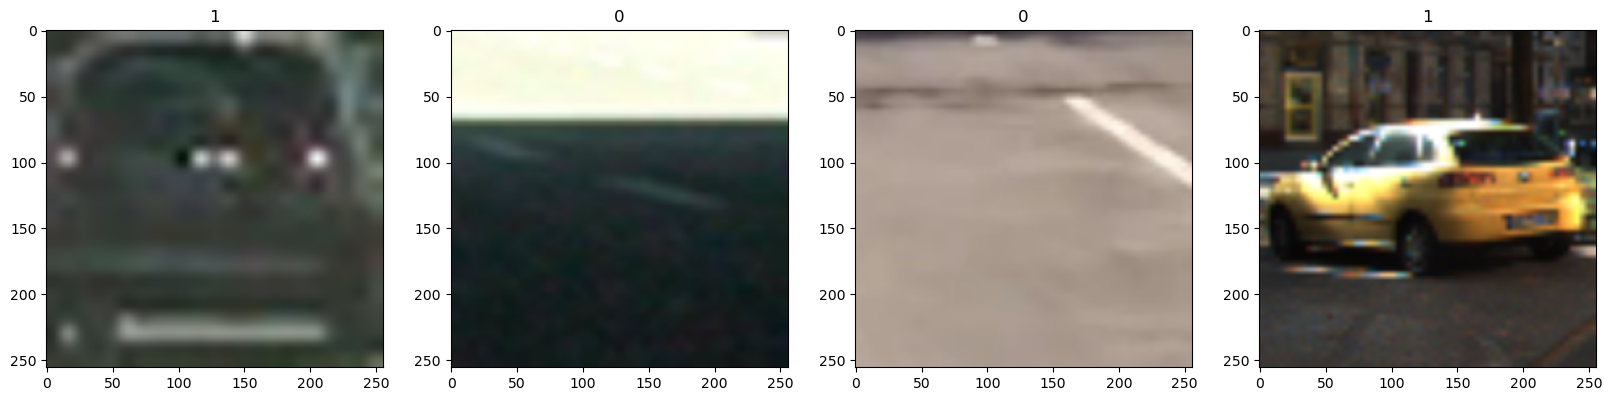

In [12]:
# Plot images from dataset
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [13]:
data = data.map(lambda x,y: (x/255, y))

In [14]:
data.as_numpy_iterator().next()

(array([[[[0.09411765, 0.07843138, 0.02352941],
          [0.09411765, 0.07843138, 0.02352941],
          [0.0872549 , 0.07156863, 0.02058824],
          ...,
          [0.18235295, 0.16666667, 0.04852941],
          [0.18039216, 0.16470589, 0.04705882],
          [0.18039216, 0.16470589, 0.04705882]],
 
         [[0.09411765, 0.07843138, 0.02352941],
          [0.09411765, 0.07843138, 0.02352941],
          [0.0872549 , 0.07156863, 0.02058824],
          ...,
          [0.18235295, 0.16666667, 0.04852941],
          [0.18039216, 0.16470589, 0.04705882],
          [0.18039216, 0.16470589, 0.04705882]],
 
         [[0.10245098, 0.08676471, 0.03137255],
          [0.10245098, 0.08676471, 0.03137255],
          [0.09479167, 0.07910539, 0.02757353],
          ...,
          [0.18082108, 0.16519608, 0.04895834],
          [0.17892157, 0.16323529, 0.04754902],
          [0.17892157, 0.16323529, 0.04754902]],
 
         ...,
 
         [[0.12107843, 0.12107843, 0.1367647 ],
          [0.12107

# 5. Split Data

In [15]:
len(data)

555

In [16]:
# Splitting data
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [17]:
train_size+val_size+test_size

554

In [18]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [19]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [21]:
model = Sequential()

In [22]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

C:\Users\ishaa\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [23]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)      │        448 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)      │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)      │      4,640 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)        │      4,624 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ flatten (Flatten)               │ (None, 14400)             │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense (Dense)                   │ (None, 256)               │  3,686,656 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1 (Dense)                 │ (None, 1)                 │        257 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

# 7. Train

In [25]:
logdir='logs'

In [26]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [27]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
388/388 ━━━━━━━━━━━━━━━━━━━━ 85s 212ms/step - accuracy: 0.8495 - loss: 0.3096 - val_accuracy: 0.9842 - val_loss: 0.0578
Epoch 2/20
388/388 ━━━━━━━━━━━━━━━━━━━━ 90s 232ms/step - accuracy: 0.9694 - loss: 0.0791 - val_accuracy: 0.9887 - val_loss: 0.0436
Epoch 3/20
388/388 ━━━━━━━━━━━━━━━━━━━━ 84s 216ms/step - accuracy: 0.9860 - loss: 0.0424 - val_accuracy: 0.9873 - val_loss: 0.0478
Epoch 4/20
388/388 ━━━━━━━━━━━━━━━━━━━━ 86s 220ms/step - accuracy: 0.9903 - loss: 0.0355 - val_accuracy: 0.9823 - val_loss: 0.0603
Epoch 5/20
388/388 ━━━━━━━━━━━━━━━━━━━━ 94s 241ms/step - accuracy: 0.9848 - loss: 0.0414 - val_accuracy: 0.9890 - val_loss: 0.0344
Epoch 6/20
388/388 ━━━━━━━━━━━━━━━━━━━━ 85s 218ms/step - accuracy: 0.9876 - loss: 0.0346 - val_accuracy: 0.9766 - val_loss: 0.0727
Epoch 7/20
388/388 ━━━━━━━━━━━━━━━━━━━━ 94s 241ms/step - accuracy: 0.9874 - loss: 0.0354 - val_accuracy: 0.9780 - val_loss: 0.0647
Epoch 8/20
388/388 ━━━━━━━━━━━━━━━━━━━━ 92s 237ms/step - accuracy: 0.9962 - loss: 0

# 8. Plot Performance

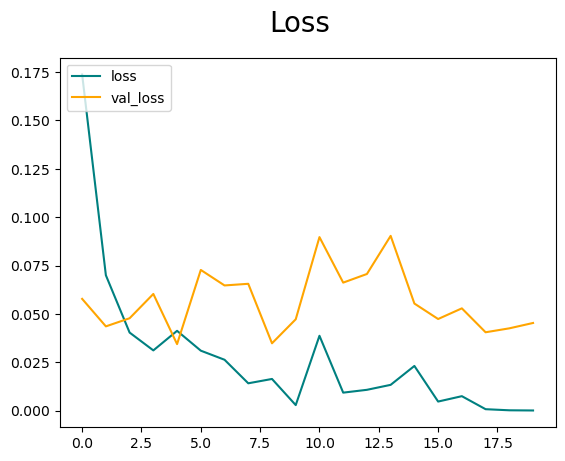

In [28]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

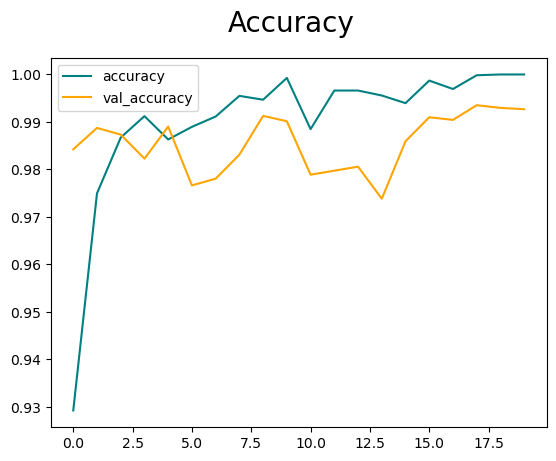

In [29]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [30]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [31]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [32]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━

In [33]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:0.9928229451179504, Recall:0.988095223903656, Accuracy:0.9909090995788574


# 10. Test

In [34]:
import cv2

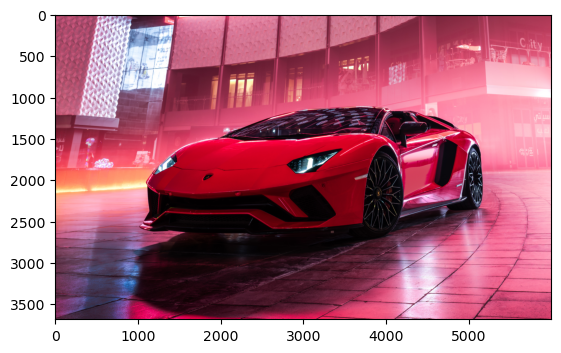

In [35]:
# Image taken from "tank_dataset"
img = cv2.imread('car.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

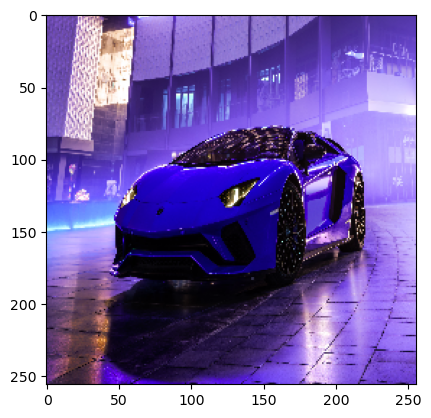

In [36]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [37]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


In [38]:
yhat

array([[1.]], dtype=float32)

In [39]:
if yhat > 0.5: 
    print(f'Predicted class is Vehicle')
else:
    print(f'Predicted class is Non-Vehicle')

Predicted class is Vehicle


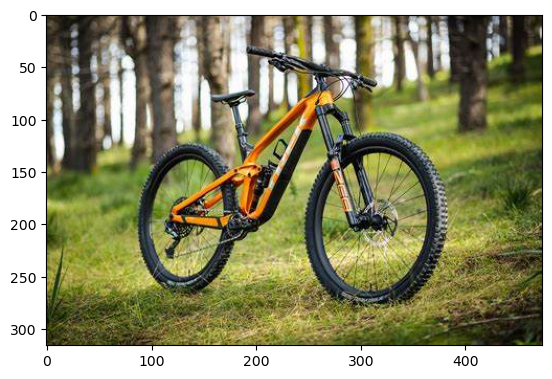

In [40]:
# Random image from Google
img = cv2.imread('bike.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

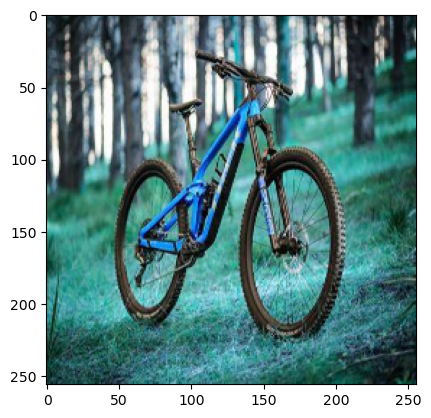

In [41]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [42]:
yhat2 = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


In [43]:
yhat2

array([[0.00420318]], dtype=float32)

In [44]:
if yhat2 > 0.5: 
    print(f'Predicted class is Vehicle')
else:
    print(f'Predicted class is Non-Vehicle')

Predicted class is Non-Vehicle


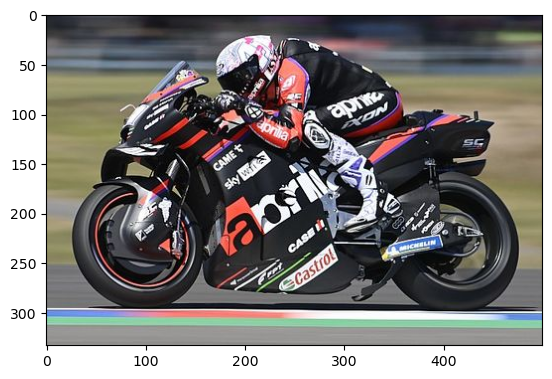

In [45]:
# Random image from Google
img = cv2.imread('motorbike.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

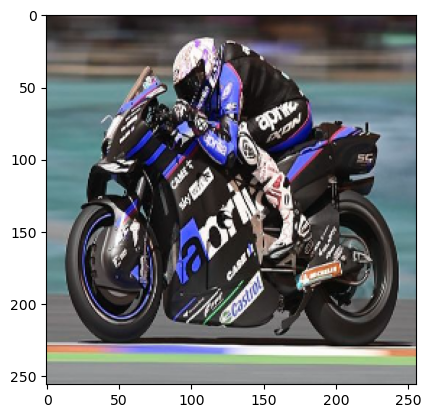

In [46]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [47]:
yhat2 = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [48]:
yhat2

array([[0.9999999]], dtype=float32)

In [49]:
if yhat2 > 0.5: 
    print(f'Predicted class is Vehicle')
else:
    print(f'Predicted class is Non-Vehicle')

Predicted class is Vehicle


# 11. Save the Model

In [94]:
from tensorflow.keras.models import load_model

In [95]:
model.save(os.path.join('models','imageclassifier.h5'))

In [97]:
new_model = load_model(os.path.join('models','imageclassifier.h5'))

In [98]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


array([[7.989316e-09]], dtype=float32)